# Ames, Iowa

### Thinkful Data Science Unit 01 Capstone Project

### Prepared by Brian McGuckin

## Dataset

__Abstract Excerpt:__

This paper presents a data set describing the sale of individual residential property in Ames, Iowa from 2006 to 2010. The data set contains 2930 observations and a large number of explanatory variables (23 nominal, 23 ordinal, 14 discrete, and 20 continuous) involved in assessing home values.

__Full Description:__

https://ww2.amstat.org/publications/jse/v19n3/decock.pdf

__Data Source:__

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

Kaggle API: >_ kaggle competitions download -c house-prices-advanced-regression-techniques

__Files Used:__

data_description.txt, train.csv

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Data Exploration Pt. 1: Price Distribution

In [3]:
#median & mean sales prices for all observations
print('Median sale price for all properties: {}'.format(train.SalePrice.median()))
print('Mean sale price for all properties: {}'.format(train.SalePrice.mean()))

Median sale price for all properties: 163000.0
Mean sale price for all properties: 180921.19589041095


In [4]:
#set plot style
sns.set_style('darkgrid')
sns.set_palette('deep')

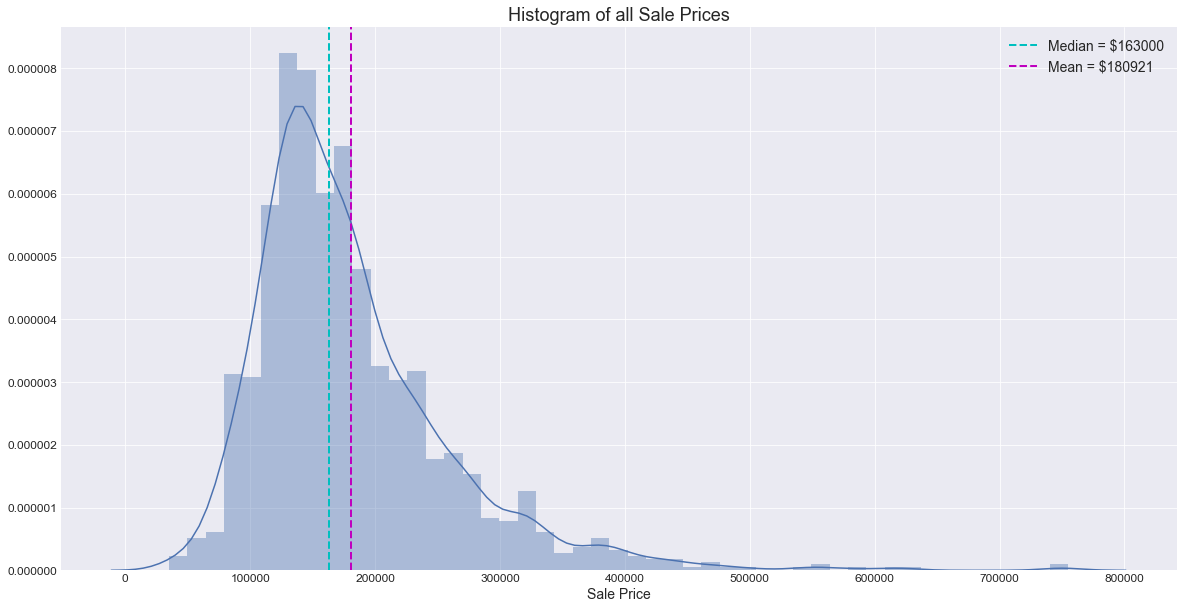

In [5]:
#histogram of all sales prices
plt.figure(figsize = (20,10))

sns.distplot(train['SalePrice'])
plt.axvline(train.SalePrice.median(), color='c', linestyle='dashed', linewidth=2,
            label='Median = ${}'.format(round(train.SalePrice.median())))
plt.axvline(train.SalePrice.mean(), color='m', linestyle='dashed', linewidth=2,
            label='Mean = ${}'.format(round(train.SalePrice.mean())))
plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel('Sale Price', size=14)
plt.title('Histogram of all Sale Prices', size=18)
plt.legend(prop={'size':14})
plt.show()

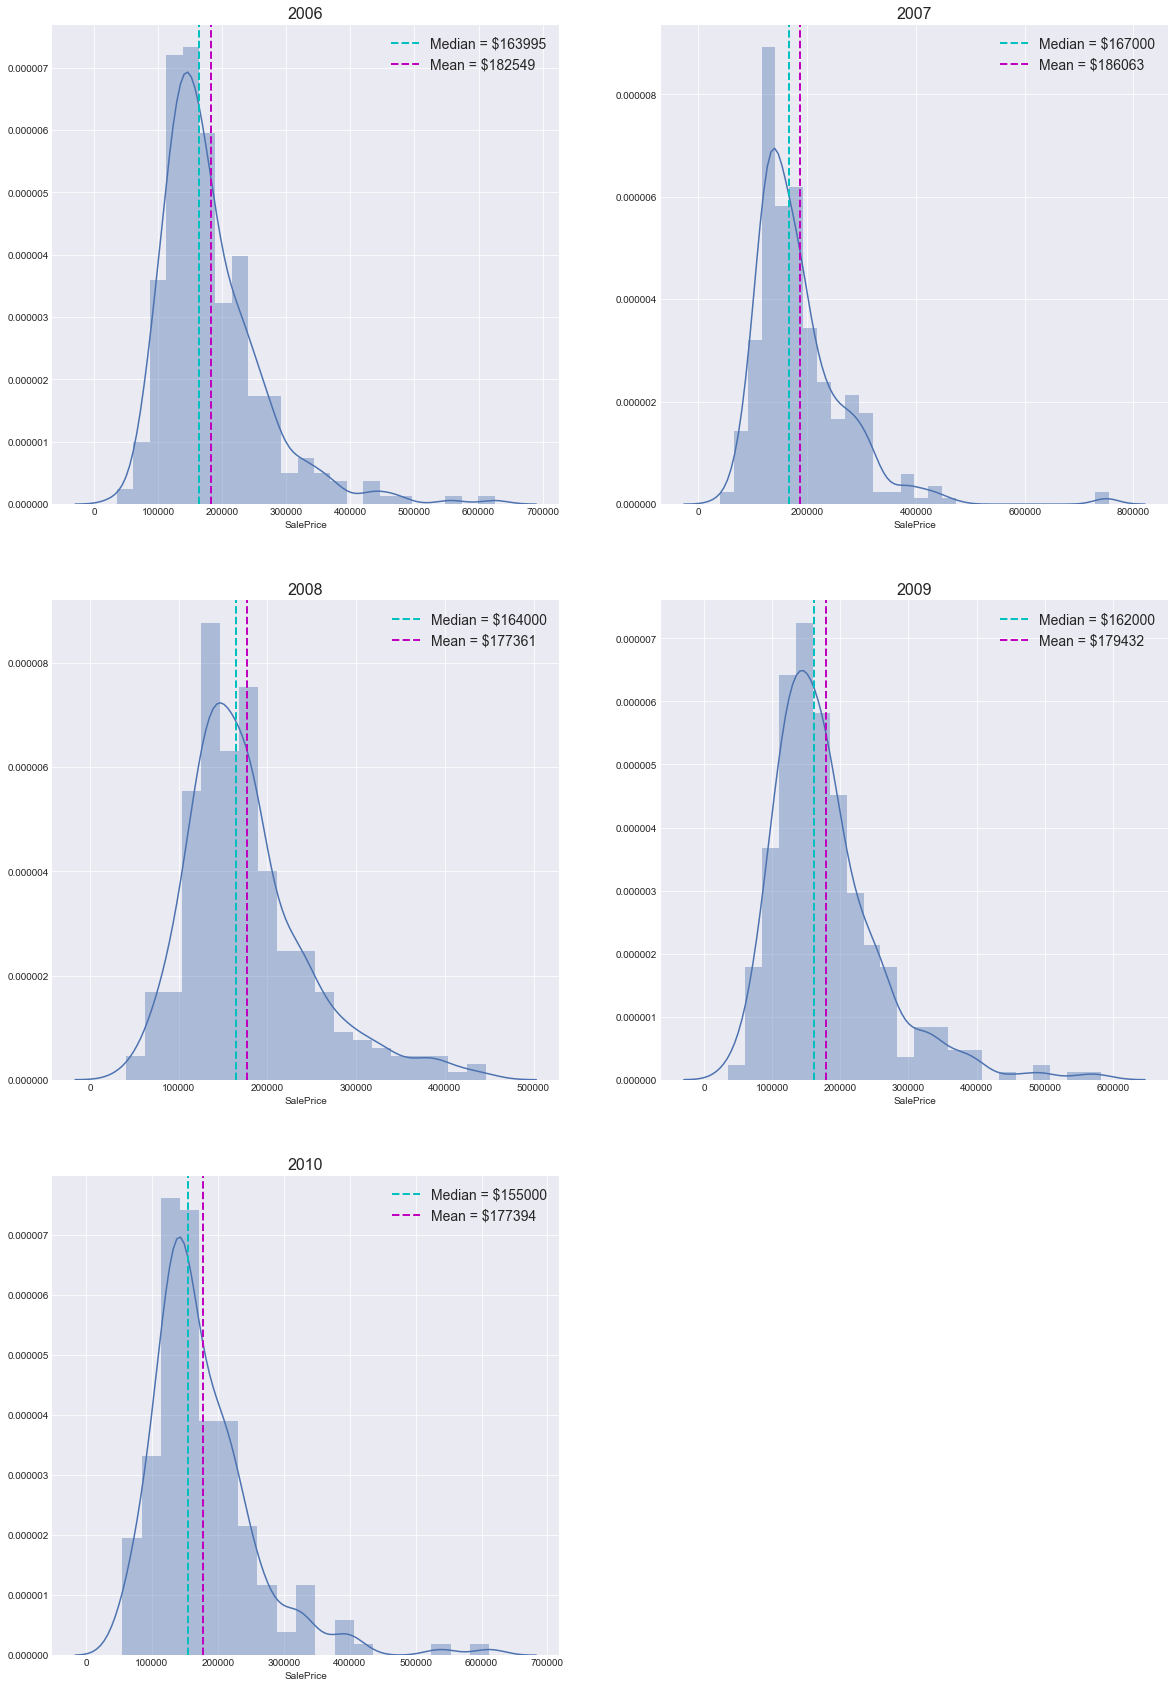

In [6]:
#plot histograms for each year
plt.figure(figsize=(20,30))


plt.subplot(3,2,1)
sns.distplot(train[train.YrSold==2006].SalePrice)
plt.title('2006', size=16)
plt.axvline(train[train.YrSold==2006].SalePrice.median(),
            color='c', linestyle='dashed', linewidth=2,
            label='Median = ${}'.format(round(train[train.YrSold==2006].SalePrice.median())))
plt.axvline(train[train.YrSold==2006].SalePrice.mean(),
            color='m', linestyle='dashed', linewidth=2,
            label='Mean = ${}'.format(round(train[train.YrSold==2006].SalePrice.mean())))
plt.legend(prop={'size':14})

plt.subplot(3,2,2)
sns.distplot(train[train.YrSold==2007].SalePrice)
plt.title('2007', size=16)
plt.axvline(train[train.YrSold==2007].SalePrice.median(),
            color='c', linestyle='dashed', linewidth=2,
            label='Median = ${}'.format(round(train[train.YrSold==2007].SalePrice.median())))
plt.axvline(train[train.YrSold==2007].SalePrice.mean(),
            color='m', linestyle='dashed', linewidth=2,
            label='Mean = ${}'.format(round(train[train.YrSold==2007].SalePrice.mean())))
plt.legend(prop={'size':14})

plt.subplot(3,2,3)
sns.distplot(train[train.YrSold==2008].SalePrice)
plt.title('2008', size=16)
plt.axvline(train[train.YrSold==2008].SalePrice.median(),
            color='c', linestyle='dashed', linewidth=2,
            label='Median = ${}'.format(round(train[train.YrSold==2008].SalePrice.median())))
plt.axvline(train[train.YrSold==2008].SalePrice.mean(),
            color='m', linestyle='dashed', linewidth=2,
            label='Mean = ${}'.format(round(train[train.YrSold==2008].SalePrice.mean())))
plt.legend(prop={'size':14})

plt.subplot(3,2,4)
sns.distplot(train[train.YrSold==2009].SalePrice)
plt.title('2009', size=16)
plt.axvline(train[train.YrSold==2009].SalePrice.median(),
            color='c', linestyle='dashed', linewidth=2,
            label='Median = ${}'.format(round(train[train.YrSold==2009].SalePrice.median())))
plt.axvline(train[train.YrSold==2009].SalePrice.mean(),
            color='m', linestyle='dashed', linewidth=2,
            label='Mean = ${}'.format(round(train[train.YrSold==2009].SalePrice.mean())))
plt.legend(prop={'size':14})

plt.subplot(3,2,5)
sns.distplot(train[train.YrSold==2010].SalePrice)
plt.title('2010', size=16)
plt.axvline(train[train.YrSold==2010].SalePrice.median(),
            color='c', linestyle='dashed', linewidth=2,
            label='Median = ${}'.format(round(train[train.YrSold==2010].SalePrice.median())))
plt.axvline(train[train.YrSold==2010].SalePrice.mean(),
            color='m', linestyle='dashed', linewidth=2,
            label='Mean = ${}'.format(round(train[train.YrSold==2010].SalePrice.mean())))
plt.legend(prop={'size':14})

plt.show()

In [7]:
#divide datasets on 2007 q3
subprime = train
subprime = subprime[subprime.YrSold>=2008]
subprime_2007 = train
subprime_2007 = subprime_2007[subprime_2007.YrSold==2007]
subprime_2007 = subprime_2007[subprime_2007.MoSold>=7]
subprime = subprime.append(subprime_2007, ignore_index=True)

pre_subprime = train
pre_subprime = pre_subprime[pre_subprime.YrSold<=2006]
pre_subprime_2007 = train
pre_subprime_2007 = pre_subprime_2007[pre_subprime_2007.YrSold==2007]
pre_subprime_2007 = pre_subprime_2007[pre_subprime_2007.MoSold<7]
pre_subprime = pre_subprime.append(pre_subprime_2007, ignore_index=True)

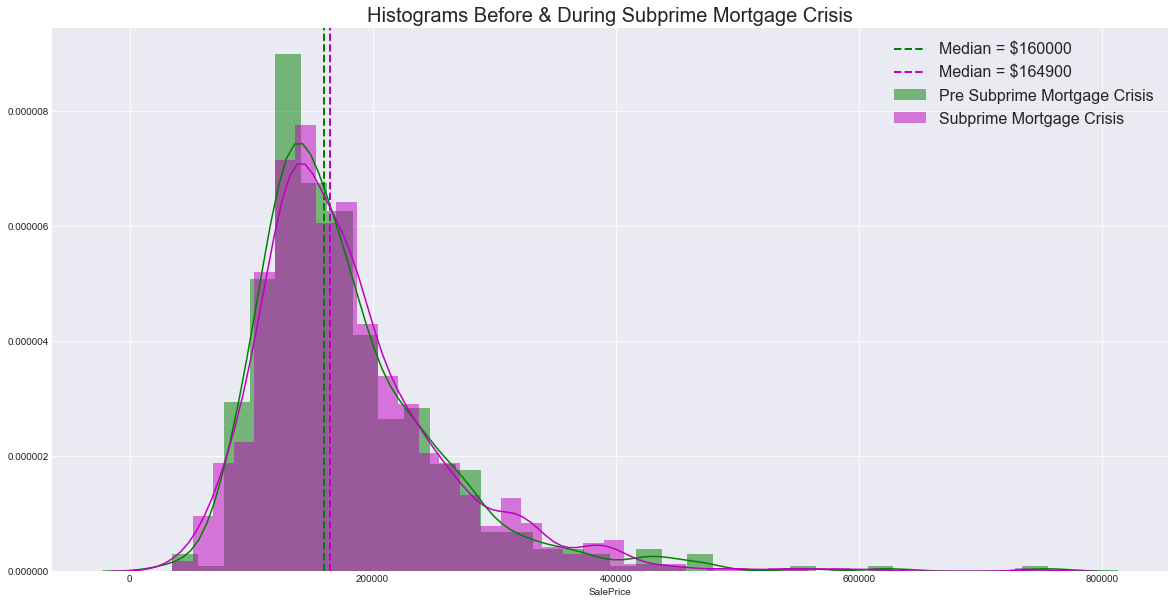

In [8]:
plt.figure(figsize=(20,10))

#pre subprime crisis
sns.distplot(pre_subprime['SalePrice'], label='Pre Subprime Mortgage Crisis',
            color='g', hist_kws={'alpha':.5})
plt.axvline(pre_subprime['SalePrice'].median(),
            color='g', linestyle='dashed', linewidth=2,
            label='Median = ${}'.format(round(pre_subprime['SalePrice'].median())))

#subprime crisis
sns.distplot(subprime['SalePrice'], label='Subprime Mortgage Crisis',
             color='m', hist_kws={'alpha':.5})
plt.axvline(subprime['SalePrice'].median(),
            color='m', linestyle='dashed', linewidth=2,
            label='Median = ${}'.format(round(subprime['SalePrice'].median())))

plt.legend(prop={'size':16})
plt.title('Histograms Before & During Subprime Mortgage Crisis', size=20)

plt.show()

__Initial Impressions, Distribution & Central Tendency:__

Sale Price exhibits both some expected and unexpected behavior. By year, sale price behaves about as one would expect, and mean and median price takes a hit beginning in 2008. 

However, when taking pre-subprime and subprime time periods in aggregate (splitting 2007 down the middle), sale price distribution, median, and mean behave nearly opposite as one would expect. Given the beginning of the subprime mortgage crisis, one would expect sale price post July 2007 to be measurably lower, especially when including data from subsequent years.

The opposite is true. This points to some data in the second half of 2007 that is radically affecting the data. Is the high end of the housing market more resilient to economic factors, thus bringing the mean up? Is the number of sales appreciably lower to the point where sample size becomes an issue? Further investigation is necessary.

What is clear is that sale price is not noramlly distributed, as there is clearly leftward skew with some peak in its shape.

In [9]:
df_2006 = train[train.YrSold==2006]
df_2007 = train[train.YrSold==2007]
df_2008 = train[train.YrSold==2008]
df_2009 = train[train.YrSold==2009]
df_2010 = train[train.YrSold==2010]

print('Medians')
print('df_2006 = {}'.format(df_2006['SalePrice'].median()))
print('pre_subprime_2007 = {}'.format(pre_subprime_2007['SalePrice'].median()))
print('subprime_2007 = {}'.format(subprime_2007['SalePrice'].median()))
print('df_2008 = {}'.format(df_2008['SalePrice'].median()))
print('df_2009 = {}'.format(df_2009['SalePrice'].median()))
print('df_2010 = {}'.format(df_2010['SalePrice'].median()),'\n')
print('pre_subprime = {}'.format(pre_subprime['SalePrice'].median()))
print('subprime = {}'.format(subprime['SalePrice'].median()), '\n')

print('Means')
print('df_2006 = {}'.format(df_2006['SalePrice'].mean()))
print('pre_subprime_2007 = {}'.format(pre_subprime_2007['SalePrice'].mean()))
print('subprime_2007 = {}'.format(subprime_2007['SalePrice'].mean()))
print('df_2008 = {}'.format(df_2008['SalePrice'].mean()))
print('df_2009 = {}'.format(df_2009['SalePrice'].mean()))
print('df_2010 = {}'.format(df_2010['SalePrice'].mean()),'\n')
print('pre_subprime = {}'.format(pre_subprime['SalePrice'].mean()))
print('subprime = {}'.format(subprime['SalePrice'].mean()), '\n')

Medians
df_2006 = 163995.0
pre_subprime_2007 = 152000.0
subprime_2007 = 178950.0
df_2008 = 164000.0
df_2009 = 162000.0
df_2010 = 155000.0 

pre_subprime = 160000.0
subprime = 164900.0 

Means
df_2006 = 182549.4585987261
pre_subprime_2007 = 175678.5621301775
subprime_2007 = 197031.875
df_2008 = 177360.83881578947
df_2009 = 179432.10355029587
df_2010 = 177393.67428571428 

pre_subprime = 180145.35610766045
subprime = 181304.74820880246 



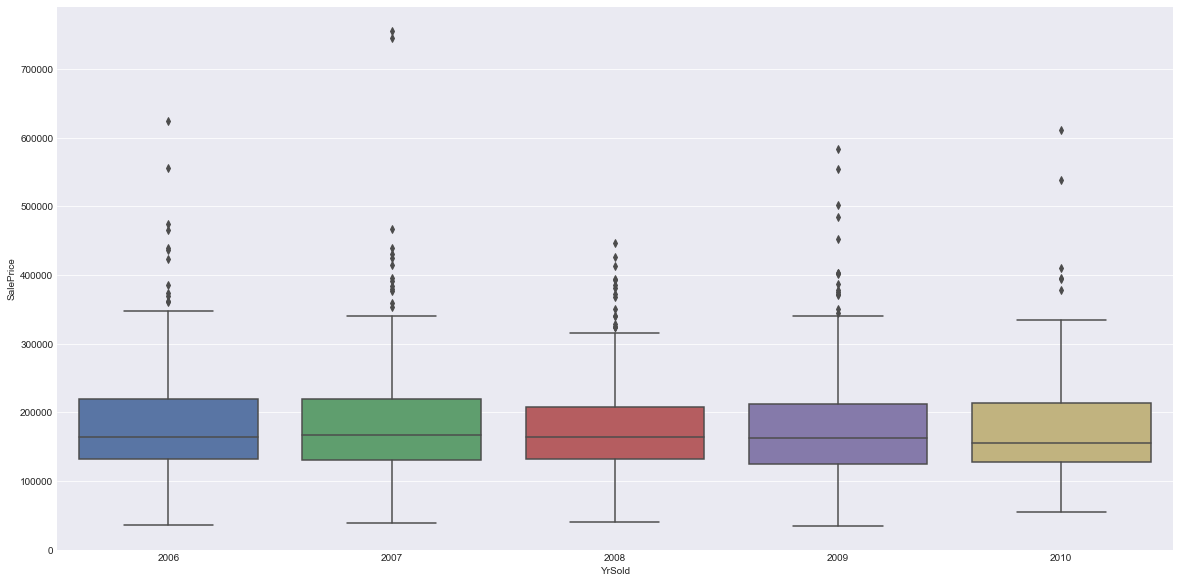

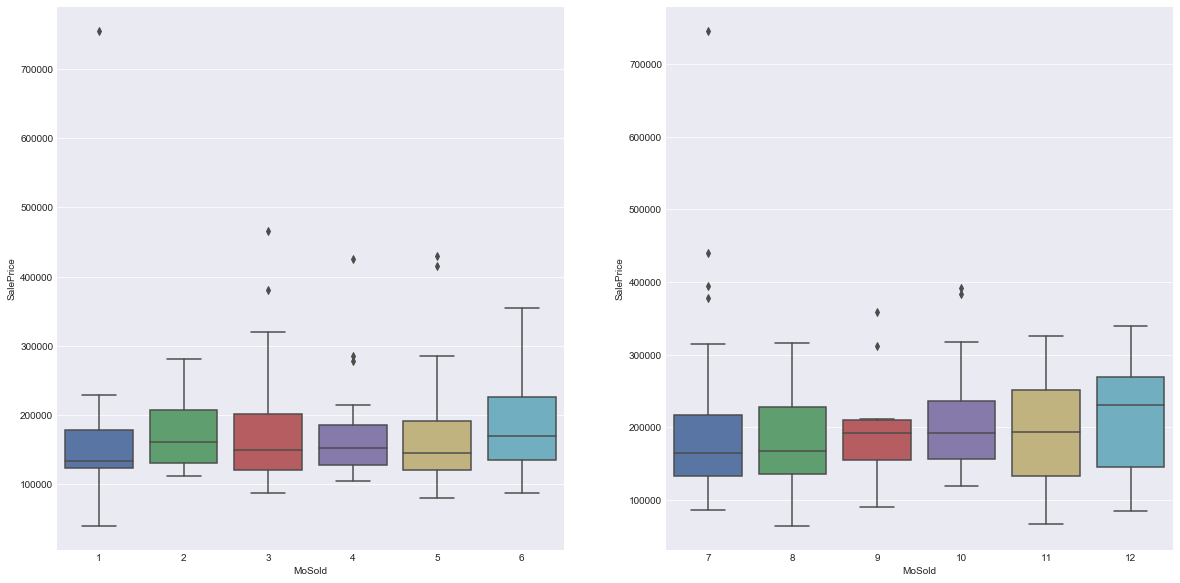

In [10]:
plt.figure(figsize=(20,10))
order1 = sorted(train.YrSold.unique())

sns.boxplot(x='YrSold', y='SalePrice', data=train, order=order1)
plt.show()

plt.figure(figsize=(20,10))
order2 = sorted(pre_subprime_2007.MoSold.unique())
order3 = sorted(subprime_2007.MoSold.unique())

plt.subplot(1,2,1)
sns.boxplot(x='MoSold', y='SalePrice',
            data=pre_subprime_2007, order=order2)

plt.subplot(1,2,2)
sns.boxplot(x='MoSold', y='SalePrice',
            data=subprime_2007, order=order3)

plt.show()

These boxplots reveal there are infact some extreme outliers, particularly in 2007, where the two highest sales prices in the data reside. Also interesting is the fact that all of the fliers in these boxplots are high, and often by an appreciable amount. Does this suggest that sale price outliers on the extreme low side are rare? Investigation into the characteristics of these particular houses and what differientiates them the rest of the market is necessary.

## Data Exploration Pt. 2: Variable Influence on Price

### Categorical Variables:
Estimate some nominal variables that may influence sale price: zoning, neighborhood, and proximity to various infrastructure

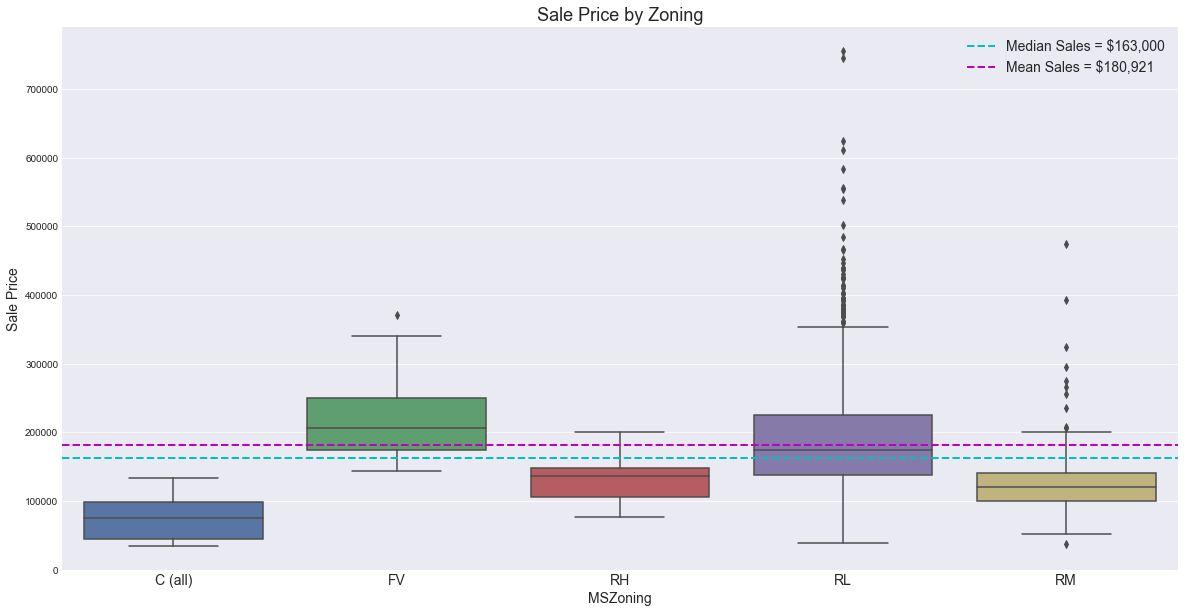

In [21]:
#zoning and sale price
plt.figure(figsize=(20,10))
order = sorted(train.MSZoning.unique())

sns.boxplot(x='MSZoning', y='SalePrice', data=train, order=order)
plt.axhline(train.SalePrice.median(), color='c', linestyle='dashed',
            linewidth=2, label='Median Sales = $163,000')
plt.axhline(train.SalePrice.mean(), color='m', linestyle='dashed',
            linewidth=2, label='Mean Sales = $180,921')
plt.xticks(size=14)
plt.xlabel('MSZoning', size=14)
plt.ylabel('Sale Price', size=14)
plt.title('Sale Price by Zoning', size=18)
plt.legend(prop={'size':14})

plt.show()

__Variables__

RL = Residential Low Density

RM = Residential Medium Density

C = Commercial

FV = Floating Village Residential

RH = Residential High Density

Zoning appears to have an impact on sale price, more significantly in the downward direction. Again, the high price fliers are present, clustered in the RL and RM zoned areas. This provides a bit of insight into the characteristics of these fliers.

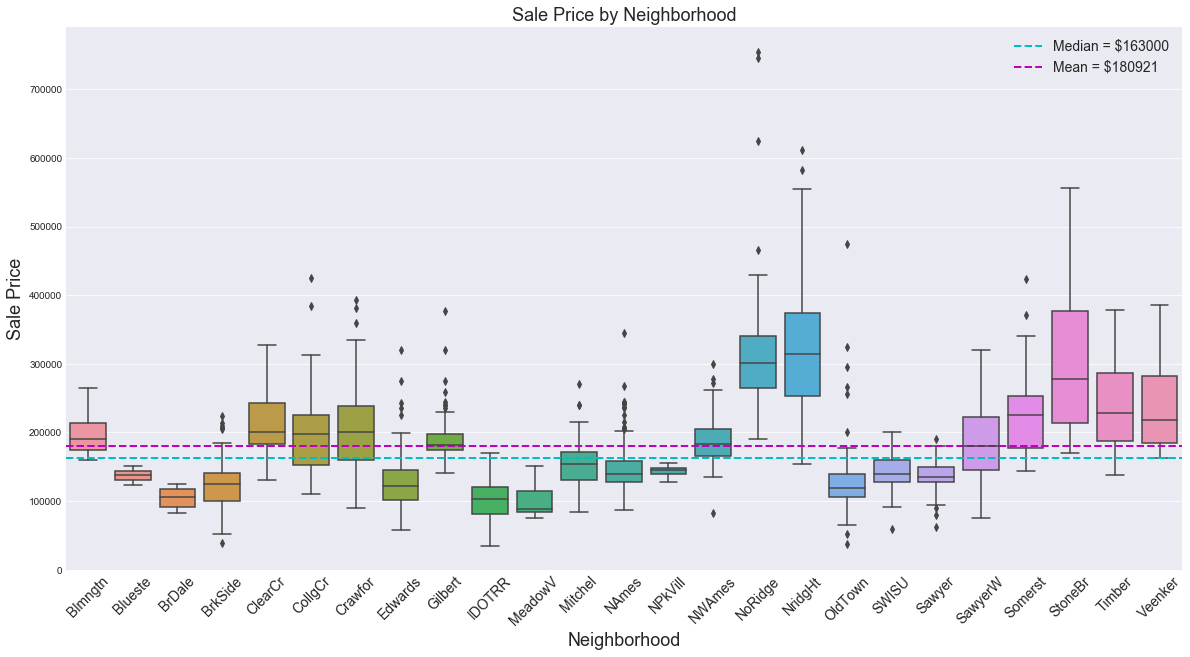

In [12]:
#neighborhood and sale price
plt.figure(figsize = (20,10))
order = sorted(train.Neighborhood.unique())

sns.boxplot(x='Neighborhood', y='SalePrice', data=train, order=order)
plt.axhline(train.SalePrice.median(), color='c', linestyle='dashed',
            linewidth=2, label='Median = ${}'.format(round(train.SalePrice.median())))
plt.axhline(train.SalePrice.mean(), color='m', linestyle='dashed',
            linewidth=2, label='Mean = ${}'.format(round(train.SalePrice.mean())))
plt.xticks(size=14, rotation=45)
plt.xlabel('Neighborhood', size=18)
plt.ylabel('Sale Price', size=18)
plt.title('Sale Price by Neighborhood', size=18)
plt.legend(prop={'size':14})

plt.show()

Not suprisingly, Neighborhood has an impact on sale price to varying degrees, and some neighborhoods show significant variance in their sale prices while others have very little. Fliers appear to be fairly common place across a few neighborhoods. Some on the low end fliers make an appearance.

In [13]:
neighborhood_counts = pd.DataFrame(train.Neighborhood.value_counts())
neighborhood_counts.head(6)

,Neighborhood
NAmes,225
CollgCr,150
OldTown,113
Edwards,100
Somerst,86
Gilbert,79


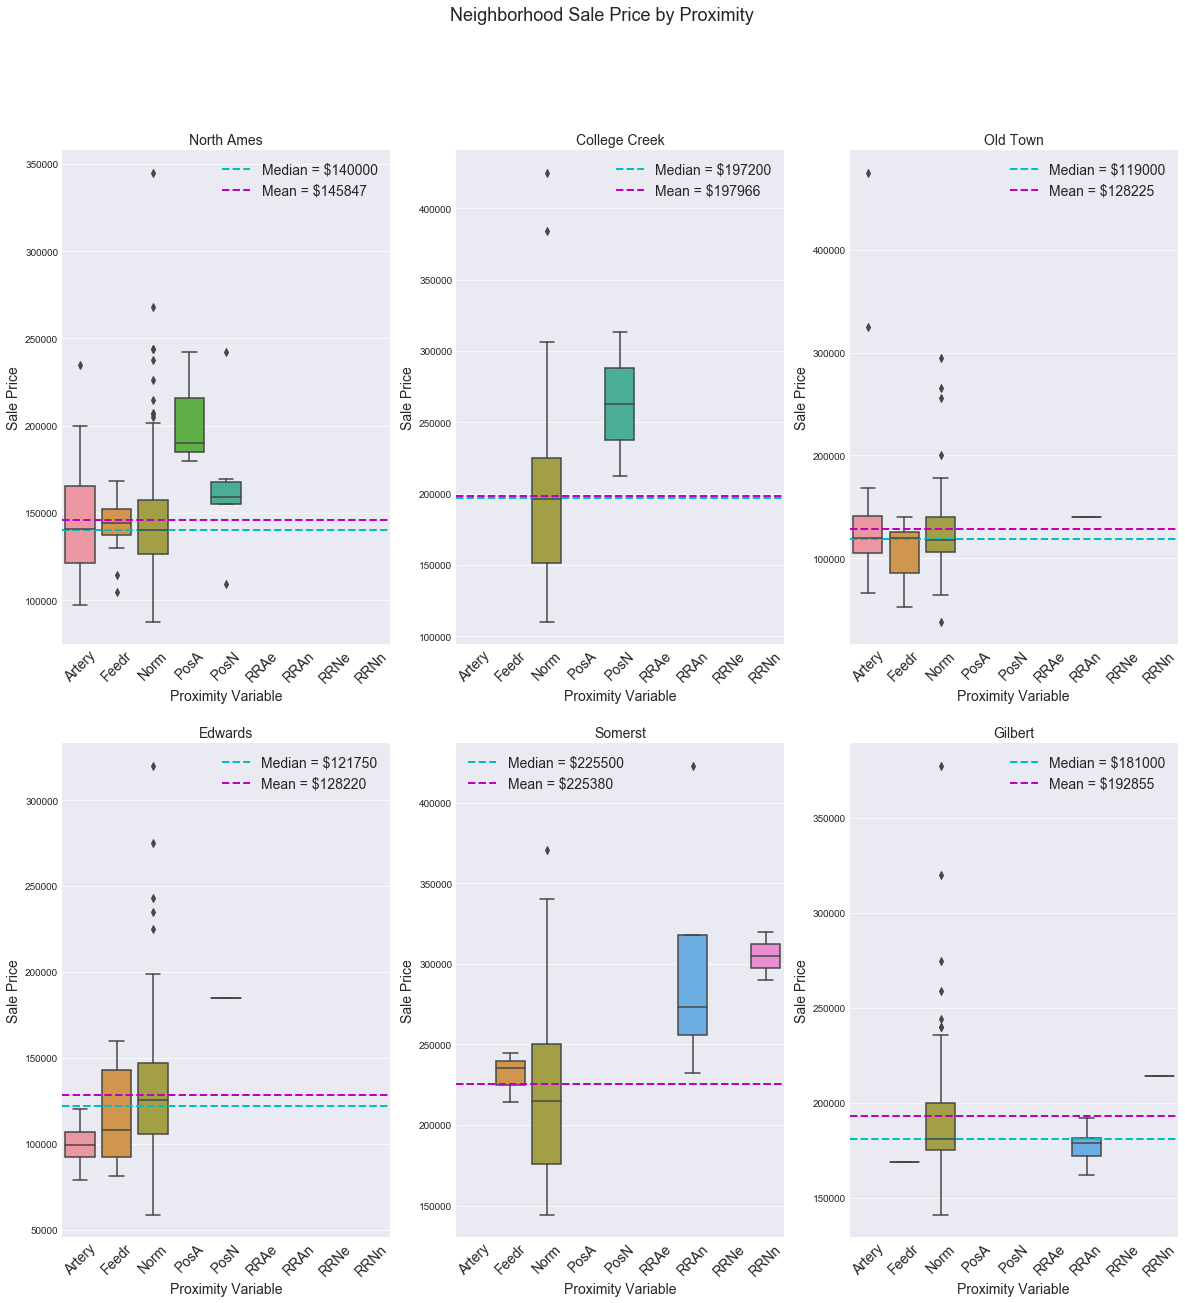

In [14]:
#sales price by proximity for largest 6 neighborhoods
NAmes = train.loc[lambda df: train['Neighborhood']=='NAmes']
CollgCr = train.loc[lambda df: train['Neighborhood']=='CollgCr']
OldTown = train.loc[lambda df: train['Neighborhood']=='OldTown']
Edwards = train.loc[lambda df: train['Neighborhood']=='Edwards']
Somerst = train.loc[lambda df: train['Neighborhood']=='Somerst']
Gilbert = train.loc[lambda df: train['Neighborhood']=='Gilbert']

plt.figure(figsize=(20,20))
plt.suptitle('Neighborhood Sale Price by Proximity', size=18)
order = sorted(train.Condition1.unique())

plt.subplot(2,3,1)
sns.boxplot(x='Condition1', y='SalePrice', data=NAmes, order=order)
plt.axhline(NAmes.SalePrice.median(), color='c', linestyle='dashed',
            linewidth=2,
            label='Median = ${}'.format(round(NAmes.SalePrice.median())))
plt.axhline(NAmes.SalePrice.mean(), color='m', linestyle='dashed',
            linewidth=2,
            label='Mean = ${}'.format(round(NAmes.SalePrice.mean())))
plt.xticks(size=14, rotation=45)
plt.xlabel('Proximity Variable', size=14)
plt.ylabel('Sale Price', size=14)
plt.title('North Ames', size=14)
plt.legend(prop={'size':14})

plt.subplot(2,3,2)
sns.boxplot(x='Condition1', y='SalePrice', data=CollgCr, order=order)
plt.axhline(CollgCr.SalePrice.median(), color='c', linestyle='dashed',
            linewidth=2, label='Median = ${}'.format(round(CollgCr.SalePrice.median())))
plt.axhline(CollgCr.SalePrice.mean(), color='m', linestyle='dashed',
            linewidth=2, label='Mean = ${}'.format(round(CollgCr.SalePrice.mean())))
plt.xticks(size=14, rotation=45)
plt.xlabel('Proximity Variable', size = 14)
plt.ylabel('Sale Price', size = 14)
plt.title('College Creek', size = 14)
plt.legend(prop={'size':14})

plt.subplot(2,3,3)
sns.boxplot(x='Condition1', y='SalePrice', data=OldTown, order=order)
plt.axhline(OldTown.SalePrice.median(), color='c', linestyle='dashed',
            linewidth=2, label='Median = ${}'.format(round(OldTown.SalePrice.median())))
plt.axhline(OldTown.SalePrice.mean(), color='m', linestyle='dashed',
            linewidth=2, label='Mean = ${}'.format(round(OldTown.SalePrice.mean())))
plt.xticks(size=14, rotation=45)
plt.xlabel('Proximity Variable', size=14)
plt.ylabel('Sale Price', size=14)
plt.title('Old Town', size=14)
plt.legend(prop={'size':14})

plt.subplot(2,3,4)
sns.boxplot(x='Condition1', y='SalePrice', data=Edwards, order=order)
plt.axhline(Edwards.SalePrice.median(), color='c', linestyle='dashed',
            linewidth=2, label='Median = ${}'.format(round(Edwards.SalePrice.median())))
plt.axhline(Edwards.SalePrice.mean(), color='m', linestyle='dashed',
            linewidth=2, label='Mean = ${}'.format(round(Edwards.SalePrice.mean())))
plt.xticks(size=14, rotation=45)
plt.xlabel('Proximity Variable', size=14)
plt.ylabel('Sale Price', size=14)
plt.title('Edwards', size=14)
plt.legend(prop={'size':14})

plt.subplot(2,3,5)
sns.boxplot(x='Condition1', y='SalePrice', data=Somerst, order=order)
plt.axhline(Somerst.SalePrice.median(), color='c', linestyle='dashed',
            linewidth=2, label='Median = ${}'.format(round(Somerst.SalePrice.median())))
plt.axhline(Somerst.SalePrice.mean(), color='m', linestyle='dashed',
            linewidth=2, label='Mean = ${}'.format(round(Somerst.SalePrice.mean())))
plt.xticks(size=14, rotation=45)
plt.xlabel('Proximity Variable', size=14)
plt.ylabel('Sale Price', size=14)
plt.title('Somerst', size=14)
plt.legend(prop={'size':14})

plt.subplot(2,3,6)
sns.boxplot(x='Condition1', y='SalePrice', data=Gilbert, order=order)
plt.axhline(Gilbert.SalePrice.median(), color='c', linestyle='dashed',
            linewidth=2, label='Median = ${}'.format(round(Gilbert.SalePrice.median())))
plt.axhline(Gilbert.SalePrice.mean(), color='m', linestyle='dashed',
            linewidth=2, label='Mean = ${}'.format(round(Gilbert.SalePrice.mean())))
plt.xticks(size=14, rotation=45)
plt.xlabel('Proximity Variable', size=14)
plt.ylabel('Sale Price', size=14)
plt.title('Gilbert', size=14)
plt.legend(prop={'size':14})

plt.show()

__Variables__

Artery = Adjacent to arterial street

Feedr = Adjacent to feeder street

Norm = Normal

PosA = Adjacent to postive off-site feature

PosN = Near positive off-site feature--park, greenbelt, etc.

RRNn = Within 200' of North-South Railroad

RRAn = Adjacent to North-South Railroad

RRNe = Within 200' of East-West Railroad

RRAe = Adjacent to East-West Railroad

Proximity to certain features appears to put some pressure on sale price. Positive feature proximity (near & adjancent) puts upward pressure on sale price. In the case of Artery, Feeder, and RR there doesn't seem to be much of a correlation - Neighborhood and other variables more likely play the role in determining the sale price for these homes.

### Numerical Variables:
No need for subjectivity, find correlations with correlation matrix

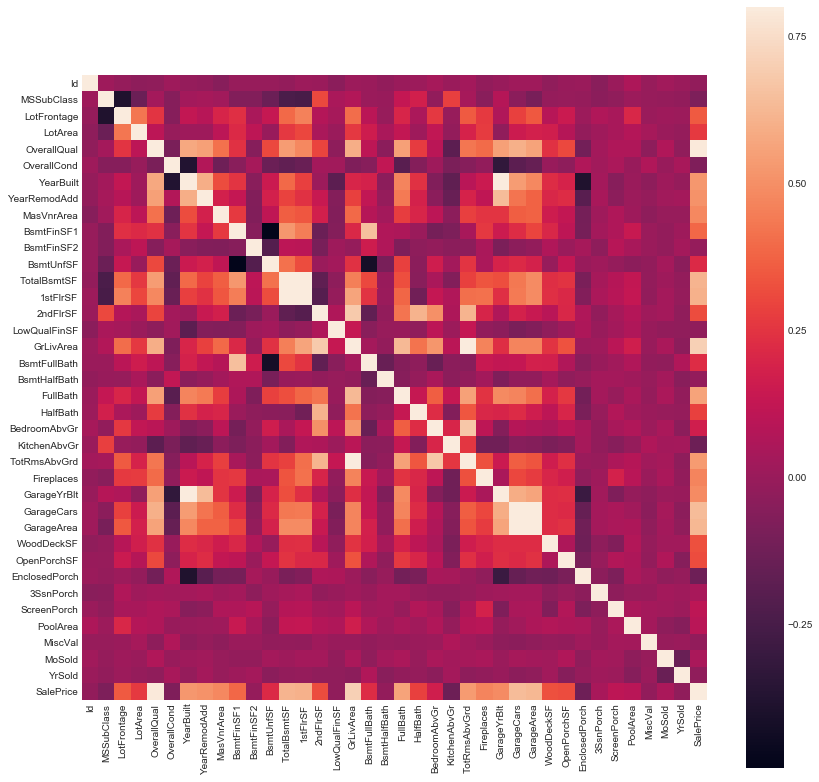

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


In [23]:
#set correlation matrix and heatmap
corrmat = train.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corrmat, vmax=0.8, square=True)

plt.show()
print(corrmat['SalePrice'].sort_values(ascending=False).head(11))

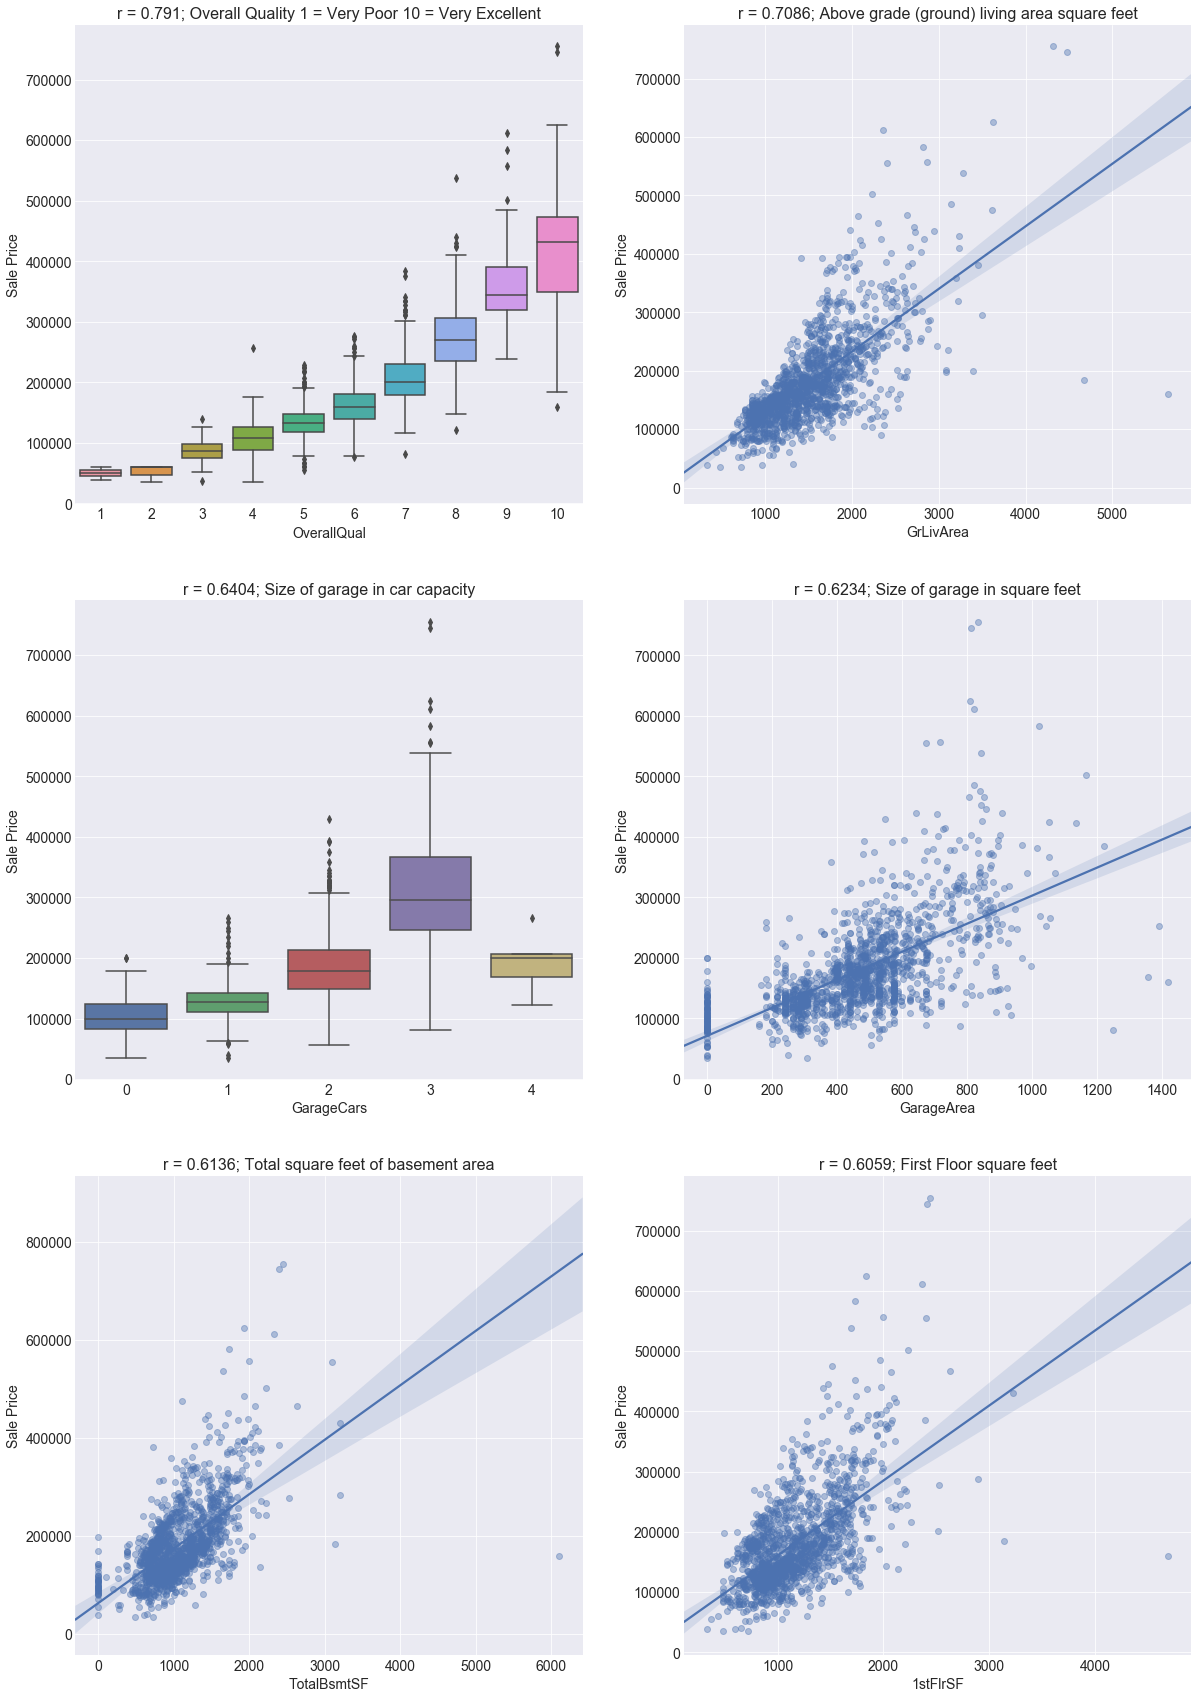

In [17]:
#plots of 10 most highly correlated variables

plt.figure(figsize=(20,30))

plt.subplot(3,2,1)
sns.boxplot(y='SalePrice', x='OverallQual', data=train)
plt.title('r = {}; Overall Quality 1 = Very Poor 10 = Very Excellent'.format(round(corrmat.OverallQual['SalePrice'],4)),
          size=16)
plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel('OverallQual', size=14)
plt.ylabel('Sale Price', size=14)

plt.subplot(3,2,2)
sns.regplot(y='SalePrice', x='GrLivArea', data=train,
            fit_reg=True, scatter_kws={'alpha':0.4})
plt.title('r = {}; Above grade (ground) living area square feet'.format(round(corrmat.GrLivArea['SalePrice'],4)),
          size=16)
plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel('GrLivArea', size=14)
plt.ylabel('Sale Price', size=14)

plt.subplot(3,2,3)
sns.boxplot(y='SalePrice', x='GarageCars', data=train)
plt.title('r = {}; Size of garage in car capacity'.format(round(corrmat.GarageCars['SalePrice'],4)),
          size=16)
plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel('GarageCars', size=14)
plt.ylabel('Sale Price', size=14)

plt.subplot(3,2,4)
sns.regplot(y='SalePrice', x='GarageArea', data=train,
            fit_reg=True, scatter_kws={'alpha':0.4})
plt.title('r = {}; Size of garage in square feet'.format(round(corrmat.GarageArea['SalePrice'],4)),
          size=16)
plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel('GarageArea', size=14)
plt.ylabel('Sale Price', size=14)

plt.subplot(3,2,5)
sns.regplot(y='SalePrice', x='TotalBsmtSF', data=train,
            fit_reg=True, scatter_kws={'alpha':0.4})
plt.title('r = {}; Total square feet of basement area'.format(round(corrmat.TotalBsmtSF['SalePrice'],4)),
          size=16)
plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel('TotalBsmtSF', size=14)
plt.ylabel('Sale Price', size=14)

plt.subplot(3,2,6)
sns.regplot(y='SalePrice', x='1stFlrSF', data=train,
            fit_reg=True, scatter_kws={'alpha':0.4})
plt.title('r = 0.6059; First Floor square feet', size=16)
plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel('1stFlrSF', size=14)
plt.ylabel('Sale Price', size=14)

plt.show()

Correlation Cofficients over .6

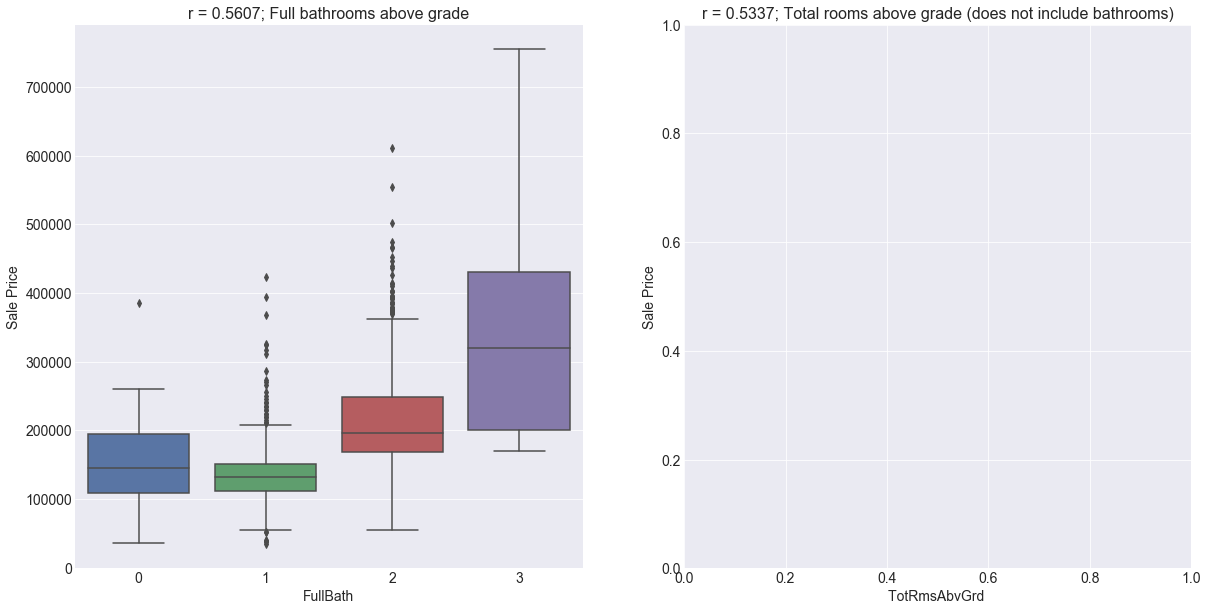

In [18]:
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
sns.boxplot(y='SalePrice', x='FullBath', data=train)
plt.title('r = {}; Full bathrooms above grade'.format(round(corrmat.FullBath['SalePrice'],4)),
          size=16)
plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel('FullBath', size=14)
plt.ylabel('Sale Price', size=14)

plt.subplot(1,2,2)
#sns.boxplot(y='SalePrice', x='TotRmsAbvGrd ', data=train) #ValueError: Could not interpret input 'TotRmsAbvGrd '
plt.title('r = {}; Total rooms above grade (does not include bathrooms)'.format(round(corrmat.TotRmsAbvGrd['SalePrice'],4)),
          size=16)
plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel('TotRmsAbvGrd ', size=14)
plt.ylabel('Sale Price', size=14)

plt.show()

r values solidly above .5

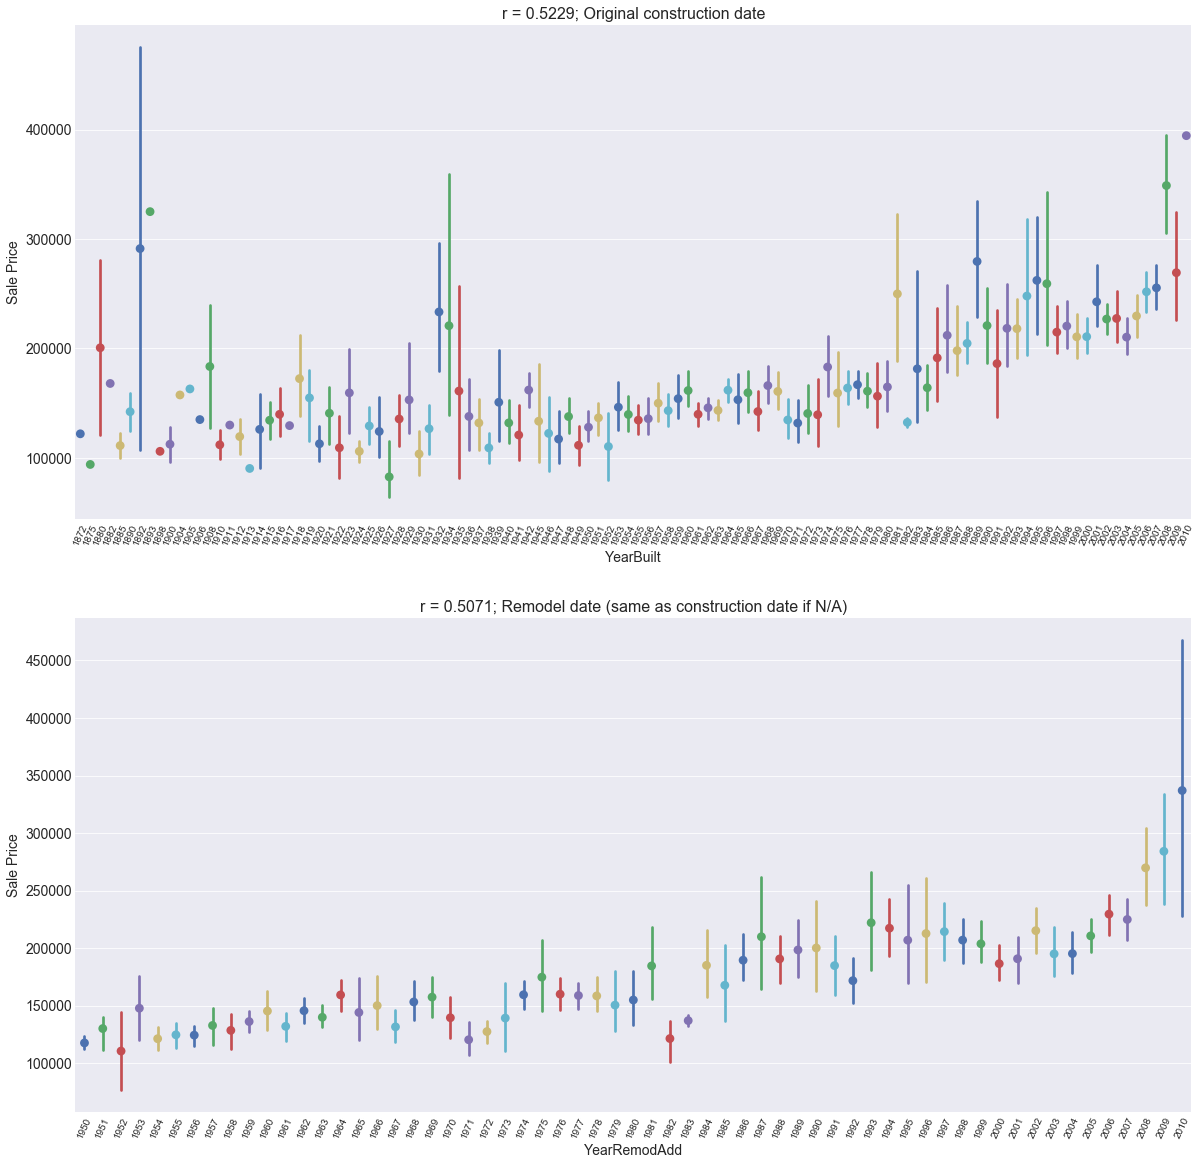

In [19]:
plt.figure(figsize=(20,20))
sns.set_style('darkgrid')

plt.subplot(2,1,1)
sns.pointplot(y='SalePrice', x='YearBuilt',
              data=train, join=False, palette='deep')
plt.title('r = {}; Original construction date'.format(round(corrmat.YearBuilt['SalePrice'],4)),
          size=16)
plt.xticks(rotation=65)
plt.yticks(size=14)
plt.xlabel('YearBuilt', size=14)
plt.ylabel('Sale Price', size=14)

plt.subplot(2,1,2)
sns.pointplot(y='SalePrice', x='YearRemodAdd',
              data=train, join=False, palette='deep')
plt.title('r = {}; Remodel date (same as construction date if N/A)'.format(round(corrmat.YearRemodAdd['SalePrice'],4)),
          size=16)
plt.xticks(rotation=65)
plt.yticks(size=14)
plt.xlabel('YearRemodAdd', size=14)
plt.ylabel('Sale Price', size=14)

plt.show()

r values above .5

In [20]:
train.TotRmsAbvGrd.head()

0    8
1    6
2    6
3    7
4    9
Name: TotRmsAbvGrd, dtype: int64

## Research Proposal

__Hypothesis:__ Homes with high values in variables that are significantly correlated with sale price were less negativaley affected by the subprime mortgage crisis than homes with lower values in these variables. These variables tend to be relatively inelastic and valuable for the prediction of home sale prices.

__Experiment:__ Compare the sale price for observations with high combinations of sales price correlated variables with the rest of the dataset over time to determine if there is significant differences in behavior between the groups.

__Evaluation:__ If sale price is more resilient during the subprime time period, the highly correlated variables are inelastic predictors of sale price.